# Support Vector Machines
## CS/DSA 5970

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle as pkl

##################
# Default parameters
FIGURESIZE=(10,6)
FONTSIZE=18

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [21]:
def scatter_plot(ins, pred):
    '''
    Generate a scatter plot of the input samples, colored by label.  This
    label can be the true or predicted labels.
    '''
    elems_true = np.where(pred == 1)[0]
    elems_false = np.where(pred == 0)[0]
    
    fig, ax = plt.subplots(figsize=FIGURESIZE)
    ax.plot(ins[elems_true,0], ins[elems_true,1], 'r.')
    ax.plot(ins[elems_false,0], ins[elems_false,1], 'g.')
    fig.legend(['Positive', 'Negative'], fontsize=18)

In [1]:
def plot_probs(outs, proba):
    '''
    Compute TPR/FPR statistics and show the TPR/FPR and ROC plots
    '''
    # Show confusion matrix assuming a neutral cut-off
    pred = proba[:,0] >= 0.5
    confusion = confusion_matrix(outs, pred)
    print("Confusion:", confusion)
    
    # Evaluate
    print("log loss: ", log_loss(outs, proba))
    
    # TPR/FPR plot
    fpr, tpr, thresholds = roc_curve(outs, proba[:,0])
    fig, ax = plt.subplots(figsize=FIGURESIZE)
    ax.plot(thresholds, tpr, color='b')
    ax.plot(thresholds, fpr, color='r')
    ax.plot(thresholds, tpr - fpr, color='g')
    ax.invert_xaxis()
    ax.set_xlabel('threshold', fontsize=FONTSIZE)
    ax.set_ylabel('fraction', fontsize=FONTSIZE)
    ax.legend(['TPR', 'FPR', 'distance'], fontsize=FONTSIZE)
    
    # ROC plot
    fig, ax = plt.subplots(figsize=FIGURESIZE)
    ax.plot(fpr, tpr, color='b')
    ax.plot([0,1], [0,1], 'r--')
    ax.set_xlabel('FPR', fontsize=FONTSIZE)
    ax.set_ylabel('TPR', fontsize=FONTSIZE)
    ax.set_aspect('equal', 'box')
    print("AUC:", auc(fpr, tpr))

## Load data

In [2]:
fname = 'data.pkl'
fp = open(fname, 'rb')
ins = pkl.load(fp)
outs = pkl.load(fp)
fp.close()

## SVC classifier: Linear

In [37]:
# Start with C=1.0, 10, 100
classifier = SVC(kernel='linear', C=10.0, probability=True)
                #class_weight='balanced')

In [38]:
pred = cross_val_predict(classifier, ins, outs, cv=10)
confusion = confusion_matrix(outs, pred)
confusion

array([[300,   0],
       [200,   0]])

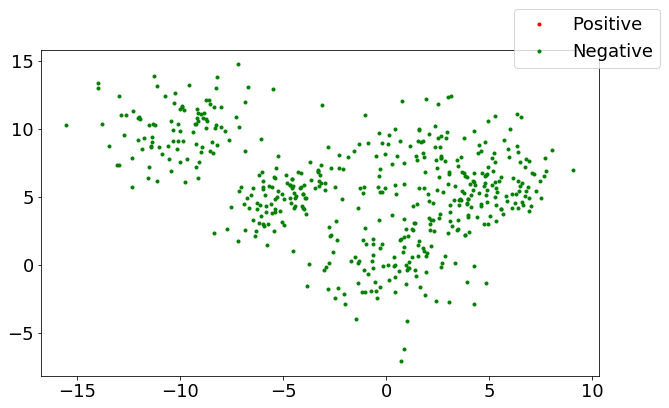

In [39]:
scatter_plot(ins, pred)

In [40]:
# SVC does not estimate probabilities, instead estimate these
#  with a wrapper
proba = cross_val_predict(classifier, ins,  outs, cv=10, 
                          method='predict_proba')
# Switch to probability of positive (1):
proba = 1-proba

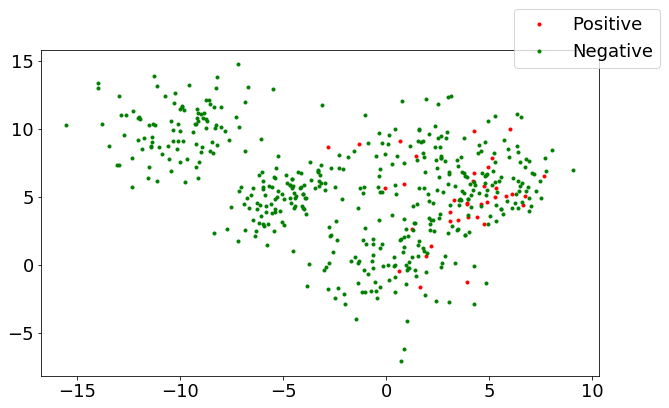

In [42]:
scatter_plot(ins, pred)

# Note: we are seeing multiple models

[[285  15]
 [178  22]]
log loss:  0.779869059484777
AUC: 0.5233166666666667


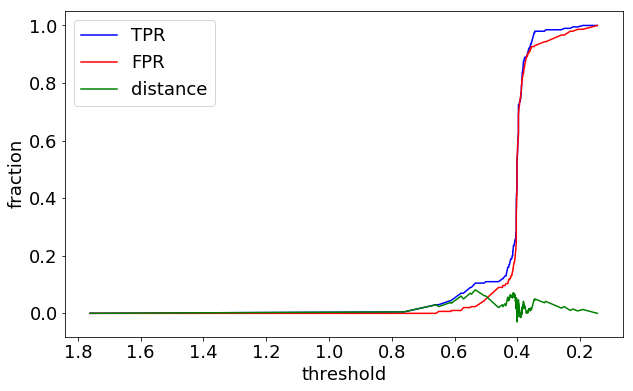

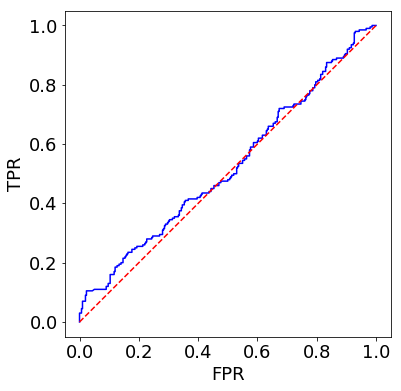

In [48]:
plot_probs(outs, proba)

In [ ]:
# SVC does not estimate probabilities, instead estimate these
#  with a wrapper
proba = cross_val_predict(classifier, ins,  outs, cv=10, 
                          method='predict_proba')
# Switch to probability of positive (1):
proba = 1-proba

## Polynomial kernel

In [59]:
classifier = SVC(kernel='poly', C=10.0, degree=2, gamma='auto',
                 probability=True)

In [60]:
pred = cross_val_predict(classifier, ins, outs, cv=10)
confusion = confusion_matrix(outs, pred)
confusion

array([[276,  24],
       [124,  76]])

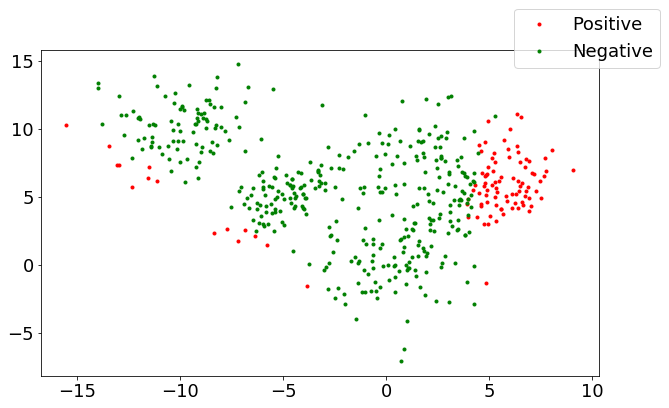

In [61]:
scatter_plot(ins, pred)

# Note: we are seeing multiple models

In [62]:
proba = cross_val_predict(classifier, ins,  outs, cv=10, 
                          method='predict_proba')
proba = 1-proba

In [63]:
pred = proba[:,0] >= 0.5
confusion = confusion_matrix(outs, pred)
confusion

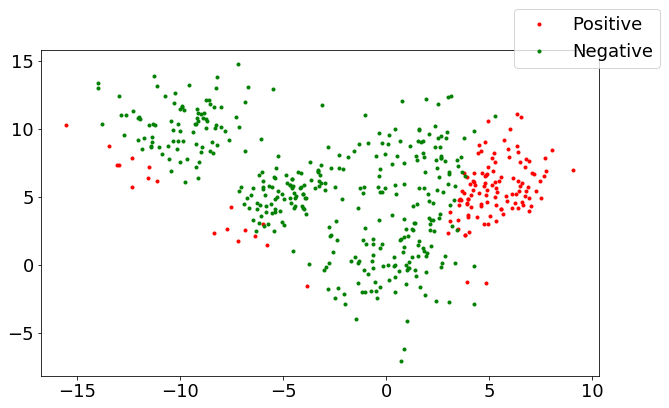

In [65]:
scatter_plot(ins, pred)

# Note: we are seeing multiple models

[[268  32]
 [102  98]]
log loss:  1.0409462319347713
AUC: 0.6988333333333333


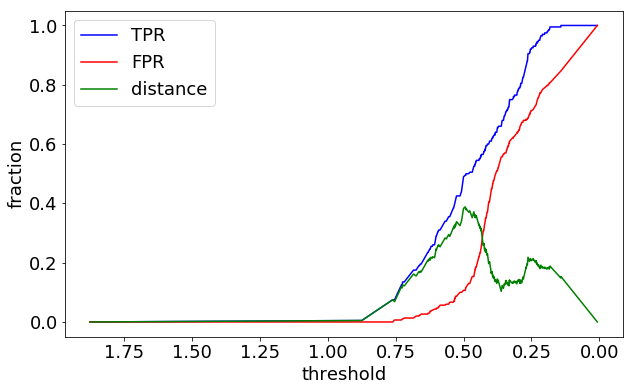

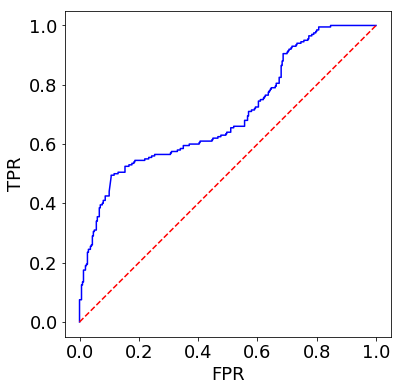

In [64]:
plot_probs(outs, proba)

## Gaussian (RBF) Kernel

In [87]:
classifier = SVC(kernel='rbf', C=.1, gamma='auto',
                 probability=True)

In [88]:
pred = cross_val_predict(classifier, ins, outs, cv=10)
confusion = confusion_matrix(outs, pred)
confusion

array([[289,  11],
       [ 33, 167]])

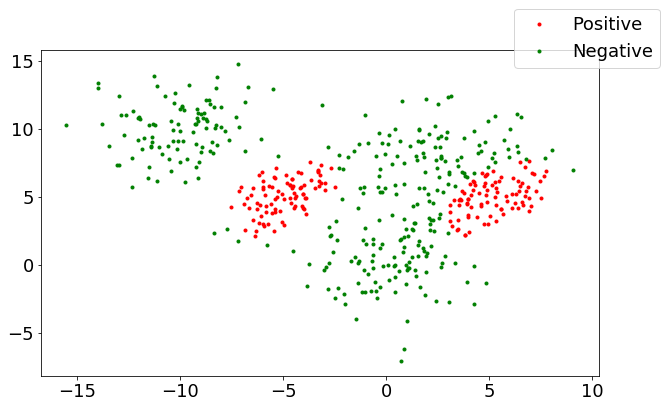

In [89]:
scatter_plot(ins, pred)

In [90]:
proba = cross_val_predict(classifier, ins,  outs, cv=10, 
                          method='predict_proba')
proba = 1-proba

In [91]:
pred = proba[:,0] >= 0.5
confusion = confusion_matrix(outs, pred)
confusion

array([[288,  12],
       [ 21, 179]])

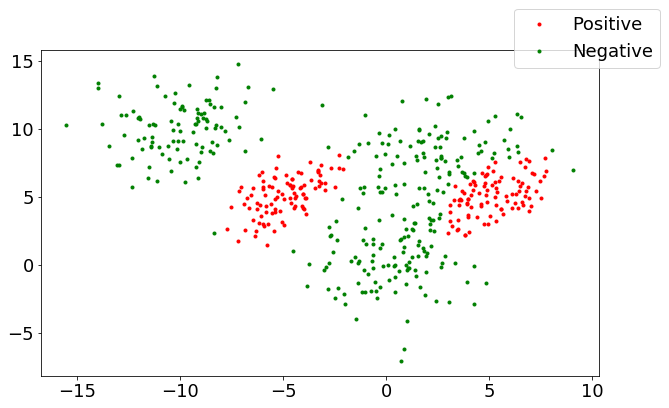

In [92]:
scatter_plot(ins, pred)


[[288  12]
 [ 21 179]]
log loss:  3.6675888177553837
AUC: 0.9721333333333333


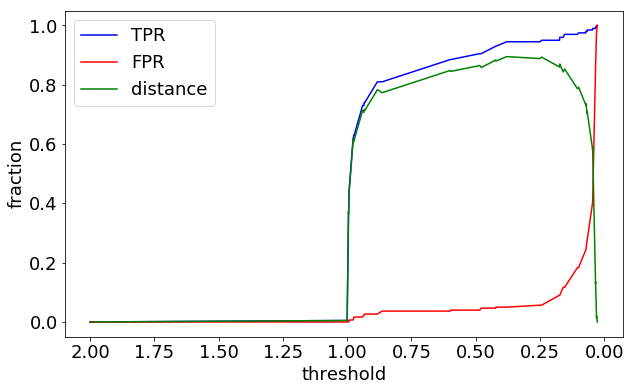

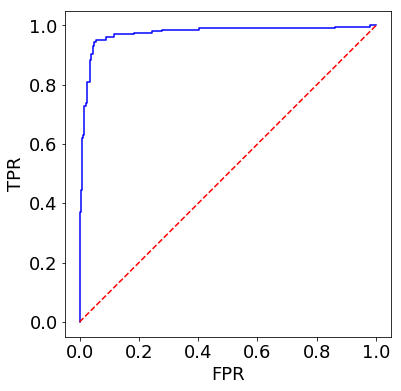

In [93]:
plot_probs(outs, proba)